In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [2]:
df = pd.read_csv("cell_data2.tsv",sep="\t",index_col=0)

In [3]:
df.head()

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,RNA.weight,ADT.weight,wsnn_res.1,seurat_clusters,...,id,manual_label,wnnUMAP_1,wnnUMAP_2,manual_label2,S.Score,G2M.Score,Phase,old.ident,Total_cell
1,mNFIXko,4737,2155,89,8,5.552037,0.101568,0.898432,2,2,...,reference,ST-HSC.1,-2.328212,0.320432,2,-0.405309,-0.320633,G1,2,6608
2,mNFIXko,15511,3995,193,8,2.952743,0.473796,0.526204,4,4,...,reference,GMP,-1.660308,-5.797249,4,-0.029853,-0.232100,G1,4,6608
3,mNFIXko,3395,1268,205,8,4.918999,0.415043,0.584957,15,15,...,reference,CMP,-3.000256,-2.831775,15,-0.253456,-0.124643,G1,15,6608
4,mNFIXko,25841,4636,147,8,2.778530,0.444490,0.555510,6,6,...,reference,ERP,6.095256,-0.901336,6,0.019043,0.175090,G2M,6,6608
5,mNFIXko,16922,3965,179,8,3.102470,0.352942,0.647058,4,4,...,reference,GMP,-1.771326,-6.140461,4,-0.239329,0.098556,G2M,4,6608


In [14]:
df2 = pd.DataFrame(df.groupby(['orig.ident','manual_label']).size())

In [15]:
df2

0
orig.ident manual_label      
mNFIXko    CMP           1120
           ERP            393
           Ery           1043
           GMP            584
           LT-HSC.1       488
           LT-HSC.2       470
           MEP            403
           MKP            912
           MPP            135
           ST-HSC.1       779
           ST-HSC.2       281
mWT        CMP           1254
           ERP            402
           Ery           1261
           GMP            805
           LT-HSC.1       987
           LT-HSC.2       308
           MEP            270
           MKP            629
           MPP            244
           ST-HSC.1       803
           ST-HSC.2       378

In [17]:
df3 = df2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


In [18]:
df3.head()

,orig.ident,manual_label,0
0,mNFIXko,CMP,16.949153
1,mNFIXko,ERP,5.947337
2,mNFIXko,Ery,15.783898
3,mNFIXko,GMP,8.837772
4,mNFIXko,LT-HSC.1,7.384988


In [21]:
p = pd.read_csv("cluster_density.kde_test.tsv",sep="\t",index_col=0,header=None)

In [22]:
p.head()

,1
0,
Ery,0.028986
CMP,0.024008
ST-HSC.1,0.009852
LT-HSC.1,0.001247
GMP,0.001157


In [23]:
df3['p'] = df3.manual_label.map(p[1].to_dict())

In [31]:
df3.head()

,orig.ident,manual_label,0,p
0,mNFIXko,CMP,16.949153,0.024008
1,mNFIXko,ERP,5.947337,0.010358
2,mNFIXko,Ery,15.783898,0.028986
3,mNFIXko,GMP,8.837772,0.001157
4,mNFIXko,LT-HSC.1,7.384988,0.001247


In [35]:
df4 = df3.pivot(index="manual_label",columns = 'orig.ident')[[0,"p"]]

In [36]:
df4['ratio'] = 

0                    p          
orig.ident      mNFIXko        mWT   mNFIXko       mWT
manual_label                                          
CMP           16.949153  17.082141  0.024008  0.024008
ERP            5.947337   5.476093  0.010358  0.010358
Ery           15.783898  17.177496  0.028986  0.028986
GMP            8.837772  10.965808  0.001157  0.001157
LT-HSC.1       7.384988  13.445035  0.001247  0.001247

In [39]:
df4.columns=['KO','WT',"P-value","P-value1"]

In [57]:
df4['ratio'] = df4.KO/df4.WT

In [65]:
df4['diff'] = df4.KO-df4.WT

In [66]:
df4

,KO,WT,P-value,P-value1,logP,ratio,diff
manual_label,,,,,,,
CMP,16.949153,17.082141,0.024008,0.024008,1.619644,0.992215,-0.132989
ERP,5.947337,5.476093,0.010358,0.010358,1.984724,1.086055,0.471243
Ery,15.783898,17.177496,0.028986,0.028986,1.537812,0.918871,-1.393598
GMP,8.837772,10.965808,0.001157,0.001157,2.936667,0.805939,-2.128036
LT-HSC.1,7.384988,13.445035,0.001247,0.001247,2.904134,0.549273,-6.060047
LT-HSC.2,7.112591,4.195614,0.003884,0.003884,2.410721,1.695244,2.916977
MEP,6.098668,3.677973,0.000028,0.000028,4.552842,1.658160,2.420695
MKP,13.801453,8.568315,0.003540,0.003540,2.450997,1.610755,5.233138
MPP,2.042978,3.323798,0.000915,0.000915,3.038579,0.614652,-1.280820


In [44]:
df4['logP'] = df4['P-value'].apply(lambda x:-np.log10(x))

6

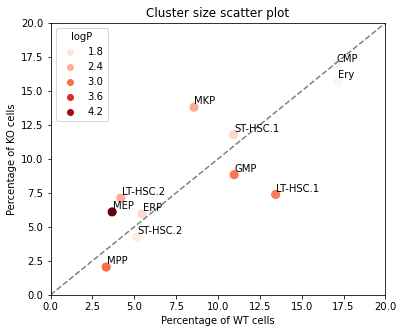

In [73]:
from adjustText import adjust_text
def add_identity(axes, *line_args, **line_kwargs):
	identity, = axes.plot([], [], *line_args, **line_kwargs)
	def callback(axes):
		low_x, high_x = axes.get_xlim()
		low_y, high_y = axes.get_ylim()
		low = max(low_x, low_y)
		high = min(high_x, high_y)
		identity.set_data([low, high], [low, high])
	callback(axes)
	axes.callbacks.connect('xlim_changed', callback)
	axes.callbacks.connect('ylim_changed', callback)
	return axes
f, ax = plt.subplots(figsize=(6, 5))
sns.scatterplot(data=df4,x="WT",y="KO",hue="logP",palette="Reds",s=100)
plt.xlim(0,20)
plt.ylim(0,20)
add_identity(ax, color='grey', ls='--')
# x = list(range(0, 20))
# y = [i*1.5 for i in x]
# plt.plot(x, y, "-")
# x = list(range(0, 20))
# y = [i*0.67 for i in x]
# plt.plot(x, y, "-")
plt.title("Cluster size scatter plot")
plt.xlabel("Percentage of WT cells")
plt.ylabel("Percentage of KO cells")

texts = []
for i,r in df4.iterrows():
    texts.append(plt.text(r["WT"], r["KO"], i))
adjust_text(texts)

In [ ]:
sns.scatterplot(data=df3,)

In [ ]:
df.pivot(index='Salesman',columns='idx')[['product','price']]